In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sales-data-for-economic-data-analysis/salesforcourse-4fe2kehu.csv
/kaggle/input/sales-data-for-economic-data-analysis/salesforcourse-4fe2kehu.xlsx


Overall, the dataset appears to provide a comprehensive view of sales transactions, with the potential for analysis at multiple levels, including by product, customer, and location. 

Year: This column represents the year in which the transaction occurred. It could be used to track trends over time or to filter the data based on a specific year or range of years.

Month: This column represents the month in which the transaction occurred. It could be used to track trends over time or to filter the data based on a specific month or range of months.

Customer Age: This column represents the age of the customer. It could be used to segment customers based on age ranges or to analyze the purchasing behavior of different age groups.

Customer Gender: This column represents the gender of the customer. It could be used to segment customers based on gender or to analyze the purchasing behavior of different genders.

Country: This column represents the country where the transaction occurred. It could be used to analyze sales by country or to filter the data based on a specific country or range of countries.

State: This column represents the state where the transaction occurred. It could be used to analyze sales by the state or to filter the data based on a specific state or range of states.

Product Category: This column represents the broad category of the product sold. It could be used to analyze sales by product category or to filter the data based on a specific product category.

Sub Category: This column represents the specific subcategory of the product sold. It could be used to analyze sales by subcategory or to filter the data based on a specific subcategory.

Quantity: This column represents the quantity of the product sold. It could be used to analyze sales volume or to calculate the total revenue generated from a particular product or product category.

Unit Cost: This column represents the cost of producing or acquiring one unit of the product. It could be used to calculate profit margins or to compare the costs of different products or product categories.

Unit Price: This column represents the price at which one unit of the product was sold. It could be used to analyze pricing strategies or to compare the prices of different products or product categories.

Cost: This column represents the total cost of the products sold, which is calculated as the product of the quantity and the unit cost. It could be used to analyze the cost structure of the business or to calculate the profit margin of each sale.

Revenue: This column represents the total revenue generated by the sales, which is calculated as the product of the quantity and the unit price. It could be used to analyze the overall sales performance of the business or to calculate the profit generated by each sale.

In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm

In [3]:
df = pd.read_csv("/kaggle/input/sales-data-for-economic-data-analysis/salesforcourse-4fe2kehu.csv")
df.head()

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,0,2/19/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,NaN
1,1,2/20/2016,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,NaN
2,2,2/27/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,NaN
3,3,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,NaN
4,4,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,NaN


In [4]:
##Identifies Non-Null and data types in datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             34867 non-null  int64  
 1   Date              34866 non-null  object 
 2   Year              34866 non-null  float64
 3   Month             34866 non-null  object 
 4   Customer Age      34866 non-null  float64
 5   Customer Gender   34866 non-null  object 
 6   Country           34866 non-null  object 
 7   State             34866 non-null  object 
 8   Product Category  34866 non-null  object 
 9   Sub Category      34866 non-null  object 
 10  Quantity          34866 non-null  float64
 11  Unit Cost         34866 non-null  float64
 12  Unit Price        34866 non-null  float64
 13  Cost              34866 non-null  float64
 14  Revenue           34867 non-null  float64
 15  Column1           2574 non-null   float64
dtypes: float64(8), int64(1), object(7)
memor

In [5]:
df.tail()

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
34862,34862,2/7/2016,2016.0,February,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,2.0,1160.0,985.500000,2320.0,1971.000000,NaN
34863,34863,3/13/2015,2015.0,March,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2049.0,1583.000000,2049.0,1583.000000,NaN
34864,34864,4/5/2015,2015.0,April,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,3.0,683.0,560.666667,2049.0,1682.000000,NaN
34865,34865,8/30/2015,2015.0,August,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2320.0,1568.000000,2320.0,1568.000000,NaN
34866,34866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,641.532095,NaN


In [6]:
#Removes data in row 34866
df = df.drop(34866, axis=0)

In [7]:
#Delete data in column "Column1"
df = df.drop('Column1', axis=1)

In [8]:
# Convert "Customer Age, Year,and Quantity " column to integer format
df['Customer Age'] = df['Customer Age'].astype(int)
df['Year'] = df['Year'].astype(int)
df['Quantity'] = df['Quantity'].astype(int)

In [9]:
# Convert "Date" column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
#Extract the year and month from the "Date" column
df['Year']=df['Date'].dt.year
df['Year_Month'] = df['Date'].dt.strftime('%Y-%m')

In [11]:
# Calculate profit for each product
df['profit'] = df['Revenue'] - df['Cost']
# Calculate profit margin for each product
df['profit_margin'] = df['profit'] / df['Revenue']

In [12]:
df.describe()

,index,Date,Year,Customer Age,Quantity,Unit Cost,Unit Price,Cost,Revenue,profit,profit_margin
count,34866.000000,34866,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000
mean,17432.500000,2016-01-19 18:35:05.110996224,2015.569237,36.382895,2.002524,349.880567,389.232485,576.004532,640.870074,64.865542,0.134077
min,0.000000,2015-01-01 00:00:00,2015.000000,17.000000,1.000000,0.670000,0.666667,2.000000,2.000000,-937.000000,-0.686747
25%,8716.250000,2015-10-26 00:00:00,2015.000000,28.000000,1.000000,45.000000,53.666667,85.000000,102.000000,5.000000,0.061679
50%,17432.500000,2016-01-28 00:00:00,2016.000000,35.000000,2.000000,150.000000,179.000000,261.000000,319.000000,27.000000,0.147963
75%,26148.750000,2016-04-26 00:00:00,2016.000000,44.000000,3.000000,455.000000,521.000000,769.000000,902.000000,96.000000,0.225677
max,34865.000000,2016-07-31 00:00:00,2016.000000,87.000000,3.000000,3240.000000,5082.000000,3600.000000,5082.000000,1842.000000,0.500000
std,10065.091579,NaN,0.495190,11.112902,0.813936,490.015846,525.319091,690.500395,736.650597,152.879908,0.135445


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


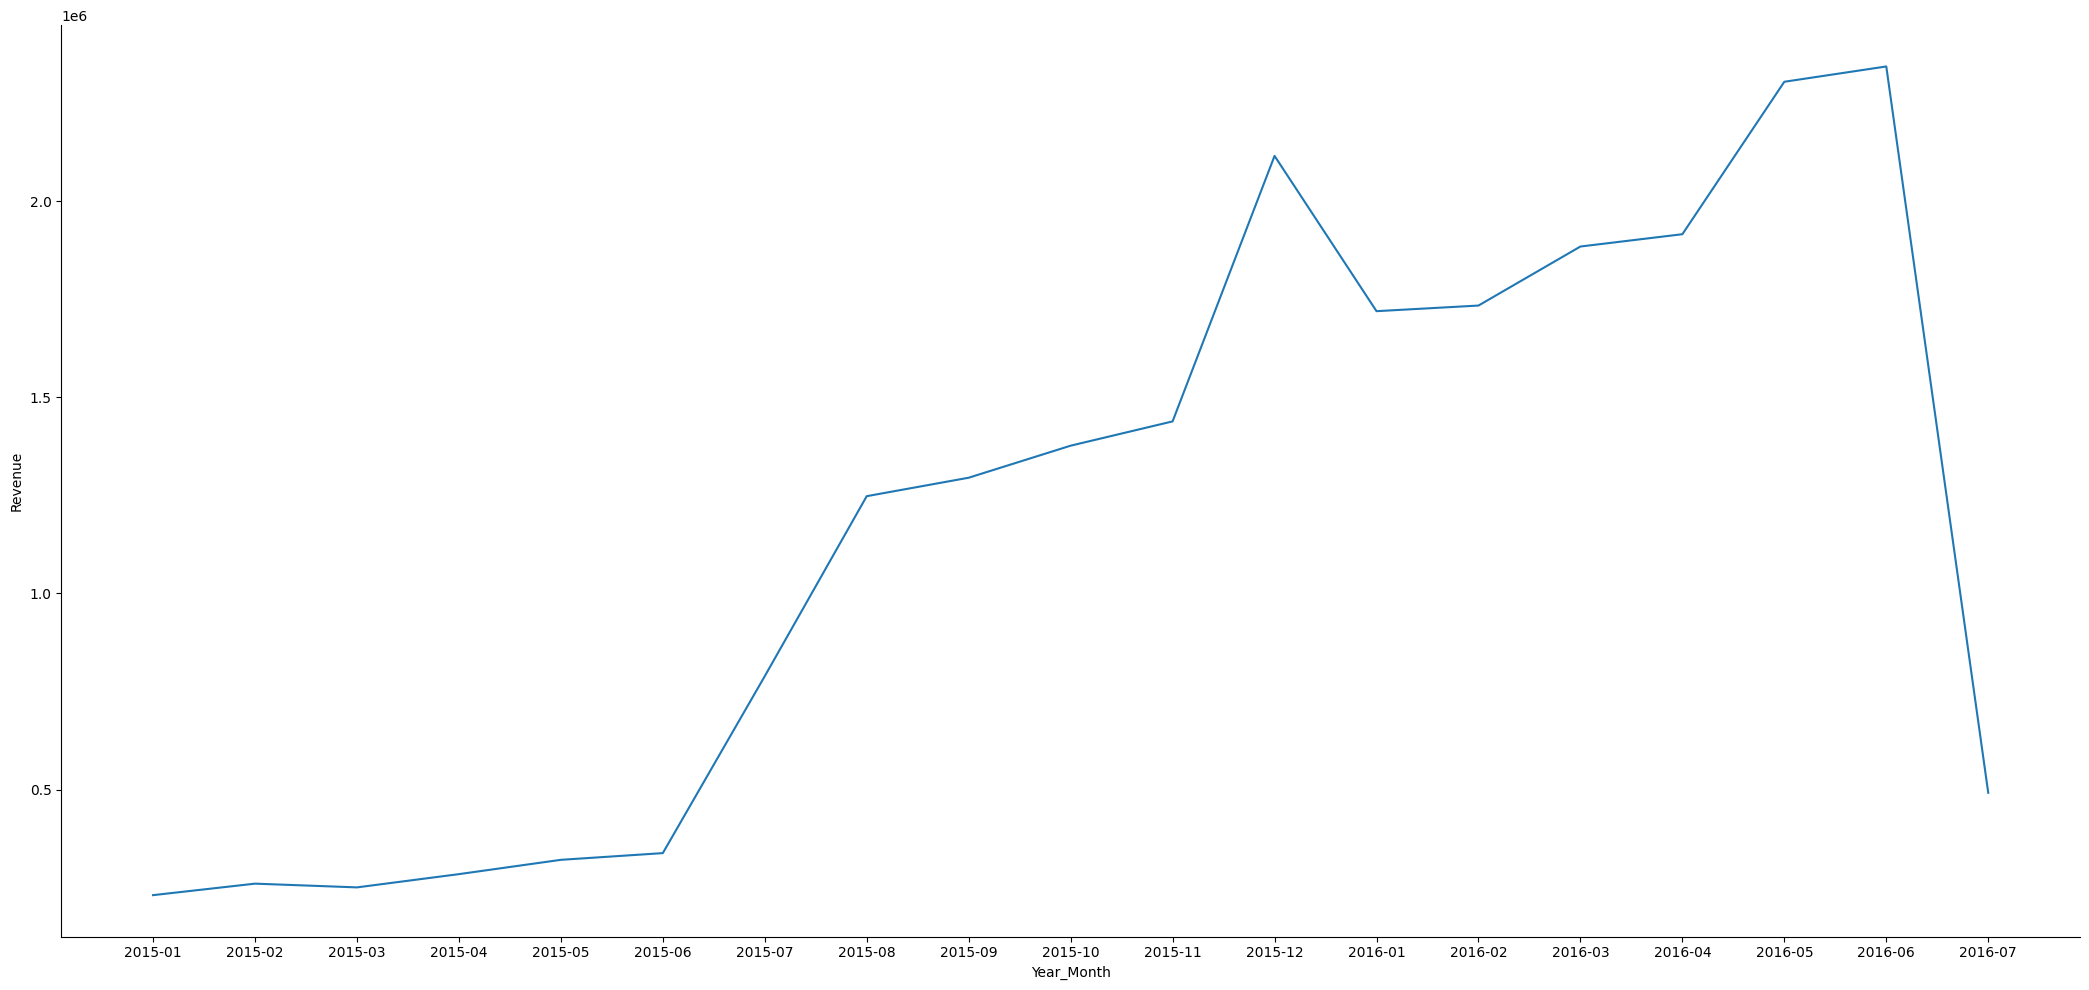

In [13]:
# Group data by Revenue and month
Month_Revenue = df.groupby(['Year_Month'])['Revenue'].sum().reset_index()
sns.relplot(data=Month_Revenue, x="Year_Month", y="Revenue", kind="line", height =10, aspect = 2.1)

**Revenue from sales tended to increase from month to month in 2015 and early 2016, then decreased drastically in July 2016. December 2015 was the month with the highest sales revenue, while July 2016 was the month with the lowest sales revenue**

**Then let's look at the costs incurred each month**

In [14]:
monthly_cost = df.groupby(['Year_Month'])['Cost'].sum().reset_index()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


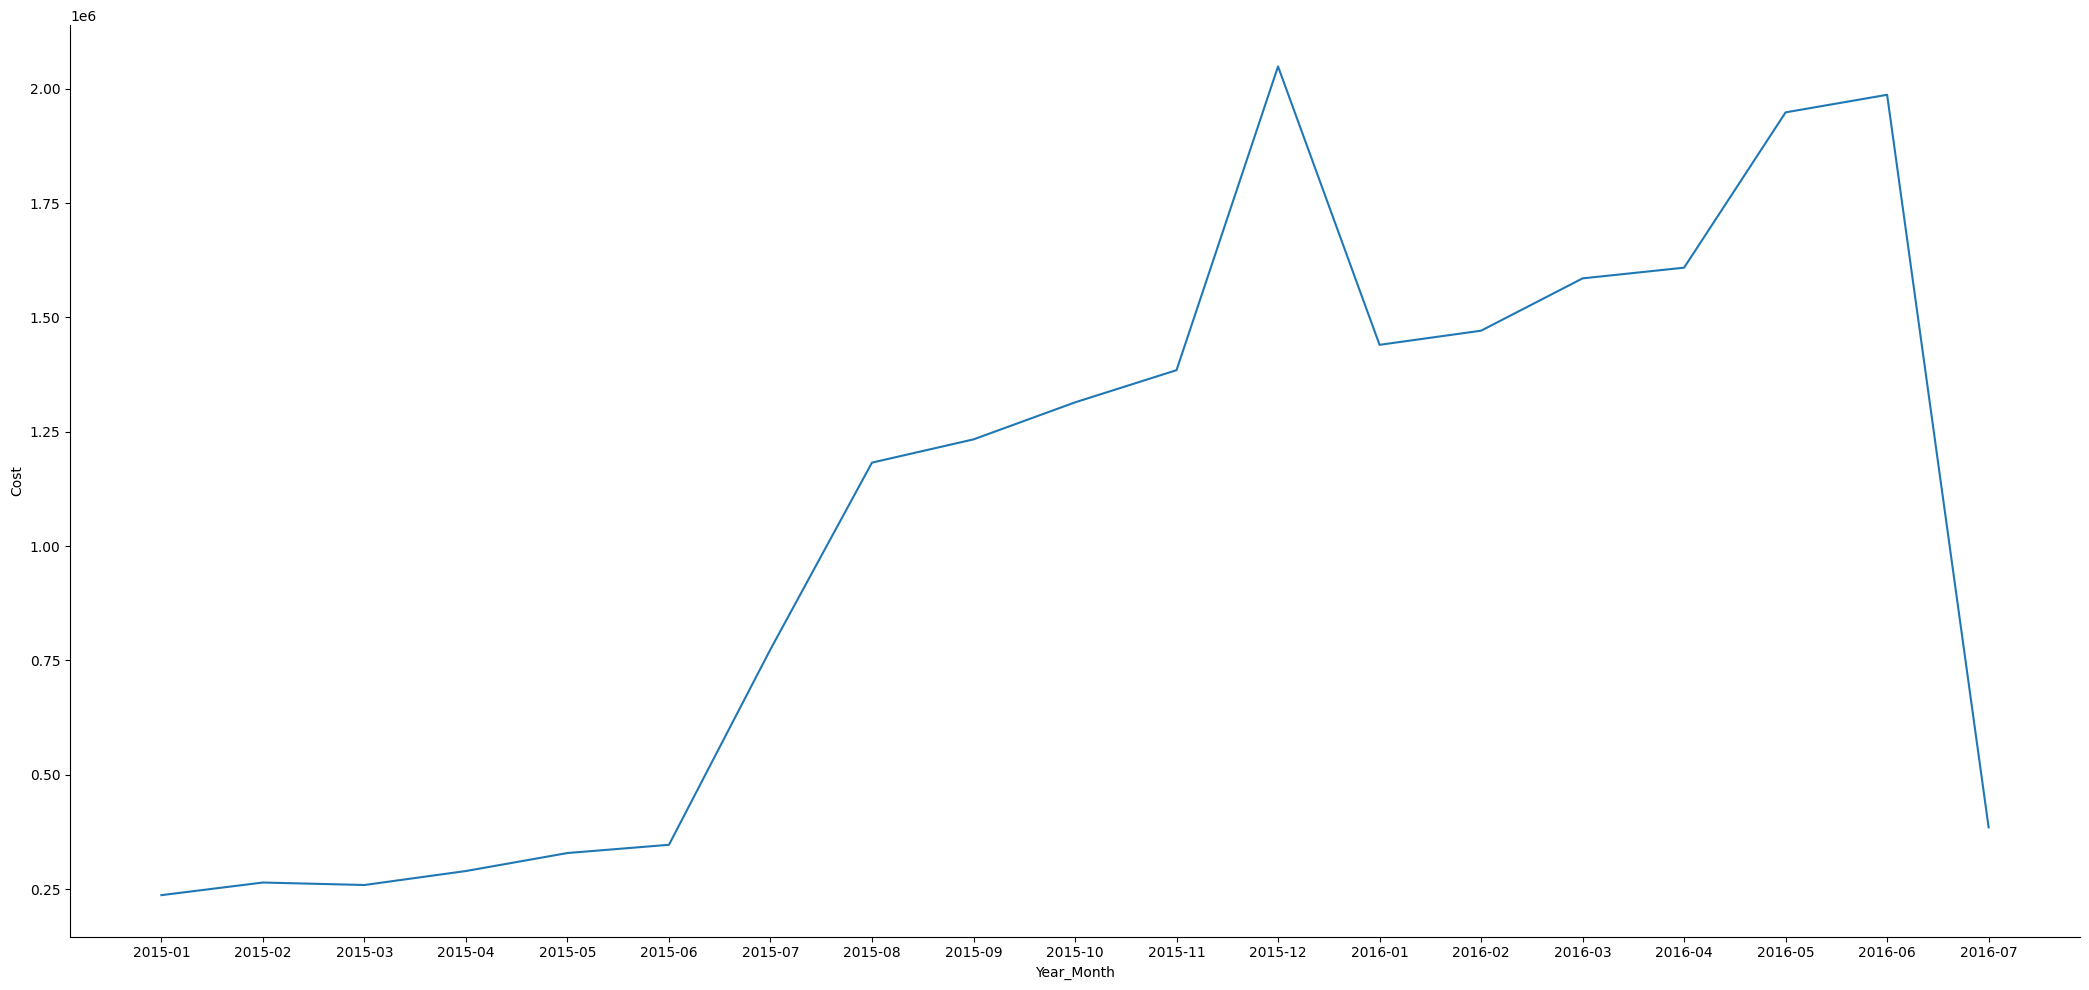

In [15]:
sns.relplot(data=monthly_cost, x="Year_Month", y="Cost", kind="line", height =10, aspect = 2.1)

**From this graph it can be seen that the trend of Cost and Revenue tends to be the same, namely increasing every month, but Cost from January 2015 to June 2015 tends to be higher than Revenue**

In [16]:
grouped = df.groupby(["Year_Month"])[['Cost', 'Revenue', 'profit']].sum().reset_index()
grouped


,Year_Month,Cost,Revenue,profit
0,2015-01,236328.0,230549.0,-5779.0
1,2015-02,263937.0,259857.0,-4080.0
2,2015-03,258522.0,250358.0,-8164.0
3,2015-04,289089.0,284143.0,-4946.0
4,2015-05,328431.0,320629.0,-7802.0
5,2015-06,346447.0,337756.0,-8691.0
6,2015-07,773950.0,789054.0,15104.0
7,2015-08,1182259.0,1248185.0,65926.0
8,2015-09,1233074.0,1295246.0,62172.0
9,2015-10,1314018.0,1376969.0,62951.0


In [17]:
fig = px.line(grouped, x='Year_Month', y=['Cost', 'Revenue', 'profit'],
              title='Monthly Performance')
fig.update_xaxes(title='Year-Month')
fig.update_yaxes(title='Amount ($)')

# menampilkan plot
fig.show()

**There is a clear seasonal pattern in this data, where profits tend to increase at the end of the year and decrease at the beginning of the next.
**

In [18]:
# Group by sub category and calculate total quantity sold
category_sales = df.groupby('Sub Category')['Quantity'].sum().reset_index()

In [19]:
fig = px.bar(category_sales, y='Sub Category', x='Quantity', text_auto='.2s',
            title="Product Sales Quantity Based on Sub Categories")
fig.show()

In [20]:
category_profit= df.groupby('Sub Category')['profit'].sum().reset_index()

In [21]:
fig = px.bar(category_profit, y='Sub Category', x='profit', text_auto='.2s',
            title="Profit by Sub Category")
fig.update_xaxes(title='Profit($)')
fig.show()

In [22]:
category_margin = df.groupby('Sub Category')['profit_margin'].mean().reset_index()

In [23]:
fig = px.bar(category_margin, y='Sub Category', x='profit_margin',
            title="Profit Margin by Sub Category")
fig.show()

**Bike Racks had the highest profit margin of 22.7%, followed by Fenders with a profit margin of 20.7%. Meanwhile, Road Bikes and Mountain Bikes have very low profit margins, respectively 0.5% and 1.0%.**

In [24]:
fig = px.histogram(df, x="Customer Age")
fig.show()

**What products are purchased the most based on the age of the customer?**

In [25]:
# Group by Customer Age and product category, sum quantity sold
df_grouped = df.groupby(["Customer Age", "Product Category"])["Quantity"].sum().reset_index()

# Find top selling product for each Customer Age
top_products = df_grouped.groupby("Customer Age").apply(lambda x: x.loc[x.Quantity.idxmax()])

# Create bar chart
fig = px.bar(top_products, x="Customer Age", y="Quantity", color="Product Category", title="Top Selling Products by Customer Age")
fig.show()

In [26]:
# Group by Customer Age and product category, sum quantity sold
df_grouped = df.groupby(["Customer Age", "Sub Category"])["Quantity"].sum().reset_index()

# Find top selling product for each Customer Age
top_products = df_grouped.groupby("Customer Age").apply(lambda x: x.loc[x.Quantity.idxmax()])

# Create bar chart
fig = px.bar(top_products, x="Customer Age", y="Quantity", color="Sub Category", title="Top Selling Sub Category Products by Customer Age")
fig.show()

**Which country has the highest profit?**

In [27]:
country_sales = df.groupby('Country')['profit'].sum().reset_index()

In [28]:
fig = px.pie(df, values='profit', names='Country', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

****What products are purchased the most in each country**
**

In [29]:
# Group by country and sub category, sum quantity sold
df_grouped = df.groupby(["Country", "Sub Category"])["Quantity"].sum().reset_index()

# Find top selling product for each country
top_products = df_grouped.groupby("Country").apply(lambda x: x.loc[x.Quantity.idxmax()])

# Create bar chart
fig = px.bar(top_products, x="Country", y="Quantity", color="Sub Category", title="Top Selling Sub Category Products by Country")
fig.show()


**"Tires and Tubes" are the most frequently purchased products in all countries in the dataset. However, what are the products with the highest profit margins in each country?**

In [30]:
# Group by country and sub category, sum quantity sold
df_grouped = df.groupby(["Country", "Sub Category"])["profit_margin"].mean().reset_index()

# Find top selling product for each country
top_products = df_grouped.groupby("Country").apply(lambda x: x.loc[x.profit_margin.idxmax()])

# Create bar chart
fig = px.bar(top_products, x="Country", y="profit_margin", color="Sub Category", title="Top Selling Products by Country and Profit Margin")
fig.show()